# Classifying chords as consonant or dissonant through a logistic regression ML model

In this experiment, I played 16 chords using a base piano preset on FL Studio and exported each as an OGG file. My model should, when given the proper features, differentiate a consonant chord from a dissonant chord using a logistic regression curve.

This is an important experiment because it shows us what features of an audio file distinguish it as being "consonant" or "dissonant." We humans have the power of music theory knowledge on our side, but can a computer do the same?

# Importing all required libraries
I am using *librosa* to process the audio.  workflow:  stream audio files into notebook,  associate them with their respective labels,  generate features,  train binary classification model,  predict and evaluate!

In [1]:
import librosa as lr
from librosa import display
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn.model_selection import train_test_split
import matplotlib as plt
import statistics as stat
from sklearn.linear_model import LogisticRegression

In [2]:
X = []
y = []
sr = 0

for i in range(8):
    consonant = lr.load(('audio/consonant' + str(i+1) + '.ogg'))
    dissonant = lr.load(('audio/dissonant' + str(i+1) + '.ogg'))
    sr = consonant[1]
    X.append(consonant)
    X.append(dissonant)
    X[2*i] = list(X[2*i][0])
    X[2*i].append(sum(lr.zero_crossings(np.asarray(X[2*i], dtype = float), pad=False)))
    
    spectral_centroid = lr.feature.spectral_centroid(np.asarray(X[2*i][0:20354], dtype = float), sr=sr)
    spectral_centroid = list(spectral_centroid[0])
    X[2*i].append(stat.mean(spectral_centroid))
    
    spectral_rolloff = list(lr.feature.spectral_rolloff(np.asarray(X[2*i][0:20354], dtype = float), sr=sr)[0])
    X[2*i].append(stat.mean(spectral_rolloff))
    
#     mfccs = lr.feature.mfcc(np.asarray(X[2*i], dtype = float), sr=sr)
#     mfccs = mfccs.reshape(800)
#     X[2*i].append(mfccs)
    
    X[2*i+1] = list(X[2*i+1][0])

    X[2*i+1].append(sum(lr.zero_crossings(np.asarray(X[2*i+1], dtype = int), pad=False)))
    
    X[2*i+1].append(stat.mean(list(lr.feature.spectral_centroid(np.asarray(X[2*i+1][0:20354], dtype = float), sr=sr)[0])))

    X[2*i+1].append(stat.mean(list(lr.feature.spectral_rolloff(np.asarray(X[2*i+1][0:20354], dtype = float), sr=sr)[0])))
    

    
    y.append(int(0))
    y.append(int(1))

X = np.asarray(X, dtype = float)
# X = np.delete(X, 1, axis=1) drops the row with sampling rate if needed
y = np.asarray(y, dtype=str)
y = y.reshape(16)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.index.name = 'sound file'

# Making sure files imported successfully

Here I use *librosa*'s display module to display a spectrogram of a wave. This is the first chord in the li

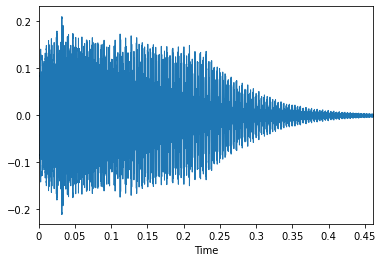

In [3]:
import IPython.display as ipd
lr.display.waveplot(X.to_numpy()[0][0:20354], sr=44100)

In [4]:
ipd.Audio(X.to_numpy()[4][0:20354], rate = sr)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

In [6]:
from sklearn.metrics import mean_squared_error
regressor = LogisticRegression()
y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train))
y_test = y_test.to_numpy()
y_test = y_test.reshape(len(y_test))
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)
'accuracy: ' + str(100.0-mean_squared_error(y_pred, y_test))

['0' '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '1' '0']
['0' '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '1' '0']


'accuracy: 100.0'

The result 0 means the chord is consonant. The result 1 means the chord is dissonant. I counted a chord as consonant or dissonant based on whether it followed basic major, minor, diminished, or augmented classifications set forth by the basic principles of music theory.

# Testing with another file
Here, I provide my model with another chord just to test if it can predict another outcome.

In [7]:
final_audio, sr = lr.load('audio/mltest.ogg')
final_audio = list(final_audio)
final_audio.append(sum(lr.zero_crossings(np.asarray(final_audio, dtype = float), pad=False)))

spectral_centroid = lr.feature.spectral_centroid(np.asarray(final_audio, dtype = float), sr=sr)
spectral_centroid = list(spectral_centroid[0])
final_audio.append(stat.mean(spectral_centroid))

spectral_rolloff = list(lr.feature.spectral_rolloff(np.asarray(final_audio, dtype = float), sr=sr)[0])
final_audio.append(stat.mean(spectral_rolloff))
final_audio = np.asarray(final_audio, dtype = float).reshape(1, len(final_audio))
final_audio = pd.DataFrame(final_audio)

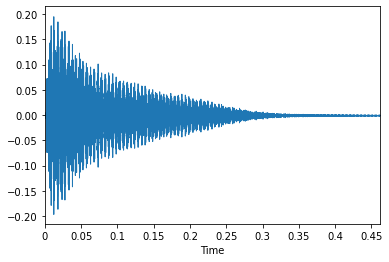

In [8]:
lr.display.waveplot(final_audio.to_numpy()[0][0:20354], sr=44100)

In [9]:
final_test = regressor.predict(final_audio)

final_test

array(['0'], dtype=object)

The result 0 means the model recognized the chord as consonant, which we can confirm by listening to it below:

In [10]:
ipd.Audio(final_audio.to_numpy()[0][0:20354], rate = sr)

The above chord has a minor quality, thus classifying it as consonant according to our criteria. The model has correctly predicted its quality, which makes me happy! :D

In the future, I can further test this model by producing a much larger dataset of consonant and dissonant chords and adding more features to the pool, such as MFCCs, or Mel-Frequency Cepstral Coefficients. These additions can make the model even more reliable in the future.